# Algorithms implementation: K-Means

## Theory (reference: The Hundred-page Machine Learning book)

The k-means clustering algorithm works as follows.

1) First, you choose k — the number of clusters.

2) Then you randomly put k feature vectors, called centroids, to the feature space.
3) We then compute the distance from each example x to each centroid c using some metric, like the Euclidean distance.
4) Then we assign the closest centroid to each example (like if we labeled each example with a centroid id as the label).
5) For each centroid, we calculate the average feature vector of the examples labeled with it. These average feature vectors become the new locations of the centroids.
6) We recompute the distance from each example to each centroid, modify the assignment and repeat the procedure until the assignments don’t change after the centroid locations were recomputed.

The model is the list of assignments of centroids IDs to the examples.

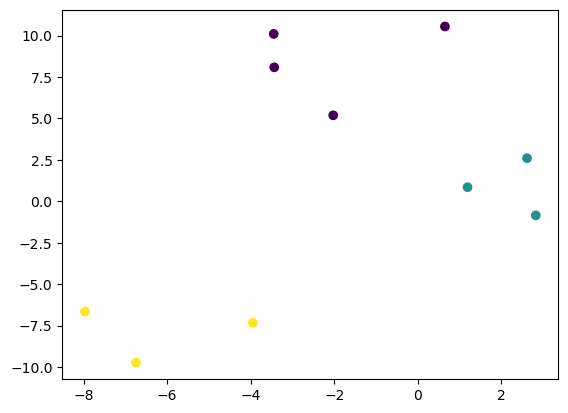

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 10,
                  centers = 3,
                  cluster_std = 2,
                  n_features = 2,
                  random_state = 42)


plt.scatter(X[:, 0], X[:, 1], c = y)

### check

In [ ]:
print(X, '\n\n\n', y)

[[-3.94832965 -7.33166219]
 [-7.96839264 -6.65826441]
 [ 2.6142166   2.60166435]
 [-6.74457078 -9.72960597]
 [-2.02527308  5.18772564]
 [-3.44814639 10.09940622]
 [ 0.64922801 10.54915559]
 [ 1.19004317  0.84859463]
 [ 2.82383069 -0.85143772]
 [-3.43603301  8.08282662]] 


 [2 2 1 2 0 0 0 1 1 0]


## Euclidian Distance (function)

In [ ]:
def euclidean_distance(X, centroids):

    '''
    Input:

    X = numpy.ndarray
    centroids = list of numpy.ndarray

    Output:

    array_euc_distance = numpy.ndarray

    '''

    array_euc_distance = np.zeros((X.shape[0], len(centroids)))

    for j in range(X.shape[0]):

        lst_euc_distance = []

        for i in range(len(centroids)):
            euc_distance = np.linalg.norm(X[j] - centroids[i])
            lst_euc_distance.append(euc_distance)

        array_euc_distance[j, :] = lst_euc_distance

    return array_euc_distance

## K-Means (class)

In [ ]:
class MyK_Means():

    def __init__(self, k, max_iter):

        '''
        Input:

        k = number of clusters
        max_iter = max number of iterations

        '''

        self.k = k
        self.max_iter = max_iter

    def predict(self, X):

        '''
        Input:

        X = numpy.ndarray

        Output:

        predict labels

        '''

        # create a random centroid
        random_centroids = []

        for i in range(self.k):

            # create random indices to initialize
            # a random position of the centroide
            idx = np.random.randint(len(X)-1)

            # X.shape[1] -> to set the size equal to  the number of columns
            random_centroids.append(np.random.choice(X[idx], size = X.shape[1], replace = False))


        # compute the distance from each example m to each centroid
        # by using the Euclidean distance.
        euclidean_dist = euclidean_distance(X, random_centroids)

        y_hat = np.zeros((y.shape)) # make np.ndarray with the shape of y

        # find the closest centroid
        for i in range(X.shape[1]):

            y_hat[i] = np.argmin(euclidean_dist[i, :])

        # assign the closest centroid to the points
        for i in range(self.k):

            for _ in np.where(y_hat == i):

                X_new = np.mean(X[i], axis = 0)



# code test

In [ ]:
random_centroids = []
for i in range(3):
    idx = np.random.randint(len(X)-1)
    # X.shape[1] -> to set the size equal to  the number of lines
    random_centroids.append(np.random.choice(X[idx], size = X.shape[1], replace = False))

random_centroids


[array([-2.02527308,  5.18772564]),
 array([2.6142166 , 2.60166435]),
 array([-9.72960597, -6.74457078])]

In [ ]:
euclidean_dist = euclidean_distance(X, random_centroids)

y_hat = y # make a copy of labels

for i in range(X.shape[0]):

    y_hat[i] = np.argmin(euclidean_dist[i, :])

y_hat

array([2, 2, 1, 2, 0, 0, 0, 1, 1, 0])

In [ ]:
y

array([2, 2, 1, 2, 0, 0, 0, 1, 1, 0])

In [ ]:
for j in range(3):

    for i in np.where(y_hat == j):
        print (j)
        # points =
        print(X[i], '\n')
        print(np.mean(X[i], axis = 0))

0
[[-2.02527308  5.18772564]
 [-3.44814639 10.09940622]
 [ 0.64922801 10.54915559]
 [-3.43603301  8.08282662]] 

[-2.06505612  8.47977852]
1
[[ 2.6142166   2.60166435]
 [ 1.19004317  0.84859463]
 [ 2.82383069 -0.85143772]] 

[2.20936348 0.86627375]
2
[[-3.94832965 -7.33166219]
 [-7.96839264 -6.65826441]
 [-6.74457078 -9.72960597]] 

[-6.22043103 -7.90651086]


In [ ]:
lst = [-2.02527308, -3.44814639, 0.64922801, -3.43603301]
sum(lst) / len(lst)

-2.0650561175

In [ ]:
np.mean(euclidean_dist[-1:])

9.164061793668221

In [ ]:
euclidean_dist

array([[12.66622352, 11.90537649,  5.81100956],
       [13.2532317 , 14.06193084,  1.76332673],
       [ 5.31155132,  0.        , 15.48296052],
       [15.64603953, 15.48054032,  4.22147724],
       [ 0.        ,  5.31155132, 14.20339548],
       [ 5.11362636,  9.6420111 , 17.97710476],
       [ 5.99148455,  8.18680628, 20.16911417],
       [ 5.40058483,  2.25865522, 13.30018414],
       [ 7.74501784,  3.45945833, 13.86786894],
       [ 3.22053618,  8.16386306, 16.10778614]])

In [ ]:
y_hat = np.zeros((y.shape))
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y.shape

(10,)

In [ ]:
type(np.zeros((3, 2)) )

numpy.ndarray

In [ ]:
random_centroids.append(np.random.choice(X[idx], size = X.shape[1], replace = False))
random_centroids

[array([-2.02527308,  5.18772564]),
 array([2.6142166 , 2.60166435]),
 array([-9.72960597, -6.74457078]),
 array([-6.74457078, -9.72960597]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-6.74457078, -9.72960597])]

In [ ]:
random_centroids

[array([-2.02527308,  5.18772564]),
 array([2.6142166 , 2.60166435]),
 array([-9.72960597, -6.74457078]),
 array([-6.74457078, -9.72960597]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-9.72960597, -6.74457078]),
 array([-6.74457078, -9.72960597])]

In [ ]:
X

array([[-3.94832965, -7.33166219],
       [-7.96839264, -6.65826441],
       [ 2.6142166 ,  2.60166435],
       [-6.74457078, -9.72960597],
       [-2.02527308,  5.18772564],
       [-3.44814639, 10.09940622],
       [ 0.64922801, 10.54915559],
       [ 1.19004317,  0.84859463],
       [ 2.82383069, -0.85143772],
       [-3.43603301,  8.08282662]])